In [23]:
import optuna

import octopus.dataset as ds
import octopus.visualization as vis
from octopus.core import predict, metrics
from octopus.preprocessing import compute_grad_image

In [2]:
import importlib

importlib.reload(predict)

<module 'octopus.core.predict' from '/Users/uzaykaradag/Developer/octopus/octopus/core/predict.py'>

In [3]:
scans, initial_elms, ground_truth_elm = ds.load_dataset()

In [4]:
scan_list = list(scans.keys())

In [19]:
test_idx = scan_list[500]
scan, initial, gt = scans[test_idx], initial_elms[test_idx], ground_truth_elm[test_idx]

In [33]:
grad_img = compute_grad_image(scan)

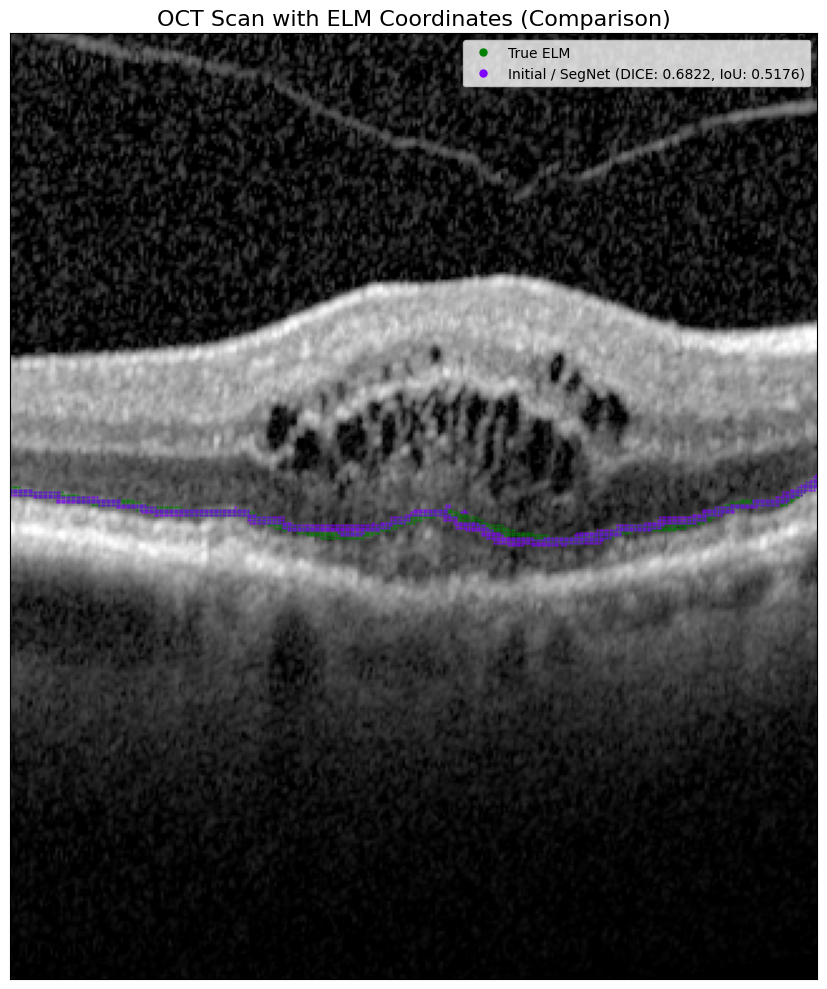

In [20]:
fig = vis.display_scan(scan, {'Initial / SegNet': initial}, gt_elm=gt)

In [58]:
kernel_options = {'kernel': 'ExpSineSquared',
                  'sigma_f': 7.630040354014101,
                  'length_scale': 6.901482713807245,
                  'alpha': 8.896502949419617,
                  'period': 5.0}
predicted_elm = predict.trace_elm(grad_img, initial, kernel_options=kernel_options, num_runs=70, subset_size=50)

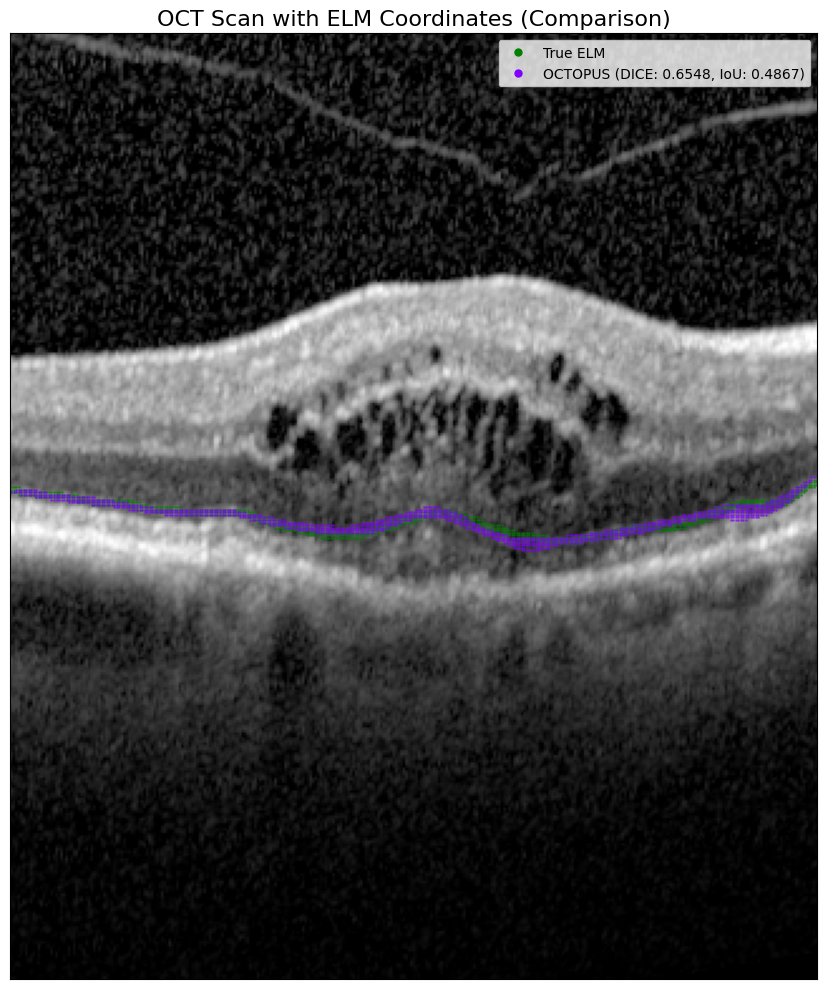

In [59]:
fig1 = vis.display_scan(scan, {'OCTOPUS': predicted_elm}, gt_elm=gt)

## Bayesian Hyperparameter Optimization 

In [21]:
# Load the single scan and its ground truth
scan = scan
gt_elm = gt

# Compute the edge map
edge_map = compute_grad_image(scan)

# Extract initial ELM coordinates (you might need to adjust this depending on your data)
initial_elm = initial

In [30]:
def objective(trial):
    # Define the hyperparameters to optimize
    kernel_options = {
        'kernel': trial.suggest_categorical('kernel', ['RBF', 'Matern', 'RationalQuadratic', 'ExpSineSquared']),
        'sigma_f': trial.suggest_float('sigma_f', 1.0, 10.0),
        'length_scale': trial.suggest_float('length_scale', 2.5, 10.0),
    }

    # Add alpha parameter if RationalQuadratic kernel is selected
    if kernel_options['kernel'] == 'RationalQuadratic':
        kernel_options['alpha'] = trial.suggest_float('alpha', 0.1, 10.0)

    # Add nu parameter if Matern kernel is selected
    if kernel_options['kernel'] == 'Matern':
        kernel_options['nu'] = trial.suggest_categorical('nu', [1.5, 2.5])

    # Call trace_elm with the trial's hyperparameters
    predicted_elm = predict.trace_elm(edge_map, initial_elm, kernel_options=kernel_options, num_runs=100)

    dice = metrics.calculate_dice(predicted_elm, gt_elm, scan.shape)
    print(dice)

    return dice


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters and the best value
print("Best parameters: ", study.best_params)
print("Best value: ", study.best_value)

[I 2024-08-08 20:03:00,424] A new study created in memory with name: no-name-679ab6c8-8294-4f5c-b406-791c50db4e1d
[I 2024-08-08 20:04:04,030] Trial 0 finished with value: 0.6536775450577025 and parameters: {'kernel': 'RBF', 'sigma_f': 3.3039883226917586, 'length_scale': 5.105968169231237}. Best is trial 0 with value: 0.6536775450577025.


0.6536775450577025


[I 2024-08-08 20:05:15,380] Trial 1 finished with value: 0.657028913261929 and parameters: {'kernel': 'RationalQuadratic', 'sigma_f': 2.515209114428766, 'length_scale': 9.41120646274825, 'alpha': 4.740701330799282}. Best is trial 1 with value: 0.657028913261929.


0.657028913261929


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may fin

0.3152965660805656


[I 2024-08-08 20:07:37,554] Trial 3 finished with value: 0.6519174041315048 and parameters: {'kernel': 'Matern', 'sigma_f': 7.064779923115479, 'length_scale': 2.781141453602904, 'nu': 1.5}. Best is trial 1 with value: 0.657028913261929.


0.6519174041315048


[I 2024-08-08 20:08:40,121] Trial 4 finished with value: 0.6268801552662451 and parameters: {'kernel': 'RBF', 'sigma_f': 5.04183798732405, 'length_scale': 6.3125610003413914}. Best is trial 1 with value: 0.657028913261929.


0.6268801552662451


[I 2024-08-08 20:09:41,084] Trial 5 finished with value: 0.6543086172362008 and parameters: {'kernel': 'RBF', 'sigma_f': 5.703391874976864, 'length_scale': 5.295963066421721}. Best is trial 1 with value: 0.657028913261929.


0.6543086172362008


[I 2024-08-08 20:10:42,825] Trial 6 finished with value: 0.6482213438752558 and parameters: {'kernel': 'RBF', 'sigma_f': 8.29187544373885, 'length_scale': 3.5693903235880255}. Best is trial 1 with value: 0.657028913261929.


0.6482213438752558


[I 2024-08-08 20:11:45,434] Trial 7 finished with value: 0.3149236192754705 and parameters: {'kernel': 'ExpSineSquared', 'sigma_f': 5.133815097716152, 'length_scale': 8.89240621331895}. Best is trial 1 with value: 0.657028913261929.


0.3149236192754705


[I 2024-08-08 20:12:57,815] Trial 8 finished with value: 0.641888498243888 and parameters: {'kernel': 'RationalQuadratic', 'sigma_f': 1.7620661474946226, 'length_scale': 8.659326507762636, 'alpha': 4.205221397631255}. Best is trial 1 with value: 0.657028913261929.


0.641888498243888


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-18. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a b

0.33829201102292955


[I 2024-08-08 20:15:15,685] Trial 10 finished with value: 0.6343476018585129 and parameters: {'kernel': 'RationalQuadratic', 'sigma_f': 1.2498173886742148, 'length_scale': 9.795491516612076, 'alpha': 8.815671421557164}. Best is trial 1 with value: 0.657028913261929.


0.6343476018585129


[I 2024-08-08 20:16:24,304] Trial 11 finished with value: 0.6650124069495533 and parameters: {'kernel': 'RationalQuadratic', 'sigma_f': 3.952338424396613, 'length_scale': 6.752564684264464, 'alpha': 1.250899555120859}. Best is trial 11 with value: 0.6650124069495533.


0.6650124069495533


[I 2024-08-08 20:17:44,889] Trial 12 finished with value: 0.6740920096868083 and parameters: {'kernel': 'RationalQuadratic', 'sigma_f': 4.237367310361644, 'length_scale': 7.13148955643747, 'alpha': 0.12413742072786338}. Best is trial 12 with value: 0.6740920096868083.


0.6740920096868083


[I 2024-08-08 20:19:11,047] Trial 13 finished with value: 0.6673218673235021 and parameters: {'kernel': 'RationalQuadratic', 'sigma_f': 4.022306449082927, 'length_scale': 7.29663094014442, 'alpha': 0.28705283460355824}. Best is trial 12 with value: 0.6740920096868083.


0.6673218673235021


[I 2024-08-08 20:20:34,651] Trial 14 finished with value: 0.6552935273474395 and parameters: {'kernel': 'RationalQuadratic', 'sigma_f': 4.105944941712195, 'length_scale': 7.507036069796675, 'alpha': 0.34814382191039395}. Best is trial 12 with value: 0.6740920096868083.


0.6552935273474395


[I 2024-08-08 20:21:37,673] Trial 15 finished with value: 0.670259676630719 and parameters: {'kernel': 'Matern', 'sigma_f': 9.94267073164054, 'length_scale': 7.540805332086542, 'nu': 2.5}. Best is trial 12 with value: 0.6740920096868083.


0.670259676630719


[I 2024-08-08 20:22:38,991] Trial 16 finished with value: 0.6644263082109245 and parameters: {'kernel': 'Matern', 'sigma_f': 9.591914727177889, 'length_scale': 7.870772374978028, 'nu': 2.5}. Best is trial 12 with value: 0.6740920096868083.


0.6644263082109245


[I 2024-08-08 20:23:41,562] Trial 17 finished with value: 0.6663351566401475 and parameters: {'kernel': 'Matern', 'sigma_f': 9.926172422800317, 'length_scale': 5.337123986359238, 'nu': 2.5}. Best is trial 12 with value: 0.6740920096868083.


0.6663351566401475


[I 2024-08-08 20:24:45,057] Trial 18 finished with value: 0.6532865027613984 and parameters: {'kernel': 'Matern', 'sigma_f': 7.257277746866638, 'length_scale': 8.091564939542716, 'nu': 2.5}. Best is trial 12 with value: 0.6740920096868083.


0.6532865027613984


[I 2024-08-08 20:25:52,323] Trial 19 finished with value: 0.6774351443970756 and parameters: {'kernel': 'Matern', 'sigma_f': 8.654539402969675, 'length_scale': 6.0368251831585535, 'nu': 1.5}. Best is trial 19 with value: 0.6774351443970756.


0.6774351443970756


[I 2024-08-08 20:26:57,113] Trial 20 finished with value: 0.6495049504967846 and parameters: {'kernel': 'Matern', 'sigma_f': 8.584822538171528, 'length_scale': 4.469642723687532, 'nu': 1.5}. Best is trial 19 with value: 0.6774351443970756.


0.6495049504967846


[I 2024-08-08 20:28:04,713] Trial 21 finished with value: 0.6686018384147624 and parameters: {'kernel': 'Matern', 'sigma_f': 8.850642022450831, 'length_scale': 6.685112289643921, 'nu': 1.5}. Best is trial 19 with value: 0.6774351443970756.


0.6686018384147624


[I 2024-08-08 20:29:10,049] Trial 22 finished with value: 0.6779830254634149 and parameters: {'kernel': 'Matern', 'sigma_f': 7.75630933244725, 'length_scale': 5.822967657300486, 'nu': 1.5}. Best is trial 22 with value: 0.6779830254634149.


0.6779830254634149


[I 2024-08-08 20:30:17,115] Trial 23 finished with value: 0.6604238541170013 and parameters: {'kernel': 'Matern', 'sigma_f': 6.246889321176269, 'length_scale': 5.802123710953836, 'nu': 1.5}. Best is trial 22 with value: 0.6779830254634149.


0.6604238541170013


[I 2024-08-08 20:31:23,860] Trial 24 finished with value: 0.6387225548920223 and parameters: {'kernel': 'Matern', 'sigma_f': 7.904277051685658, 'length_scale': 4.092849985813402, 'nu': 1.5}. Best is trial 22 with value: 0.6779830254634149.


0.6387225548920223


[I 2024-08-08 20:32:28,523] Trial 25 finished with value: 0.656962639497055 and parameters: {'kernel': 'Matern', 'sigma_f': 6.261861731285366, 'length_scale': 5.972155571585875, 'nu': 1.5}. Best is trial 22 with value: 0.6779830254634149.


0.656962639497055


[I 2024-08-08 20:33:30,980] Trial 26 finished with value: 0.6798839458429405 and parameters: {'kernel': 'RationalQuadratic', 'sigma_f': 7.630040354014101, 'length_scale': 6.901482713807245, 'alpha': 8.896502949419617}. Best is trial 26 with value: 0.6798839458429405.


0.6798839458429405


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-18. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-18. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-18. Decreasing the bound and calling fit again may find a better valu

0.3202346041095588


[I 2024-08-08 20:35:39,291] Trial 28 finished with value: 0.6483241620827997 and parameters: {'kernel': 'Matern', 'sigma_f': 9.133566747959055, 'length_scale': 6.34041841560712, 'nu': 1.5}. Best is trial 26 with value: 0.6798839458429405.


0.6483241620827997


[I 2024-08-08 20:36:41,605] Trial 29 finished with value: 0.6275484833434731 and parameters: {'kernel': 'RBF', 'sigma_f': 8.02358632612168, 'length_scale': 5.607133674595842}. Best is trial 26 with value: 0.6798839458429405.


0.6275484833434731


[W 2024-08-08 20:36:51,010] Trial 30 failed with parameters: {'kernel': 'RationalQuadratic', 'sigma_f': 9.151052784805271, 'length_scale': 4.646898425295097, 'alpha': 9.686250899591398} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/_g/3jdpr0d14q1g62hkp6vf5mlh0000gn/T/ipykernel_5083/4157344544.py", line 18, in objective
    predicted_elm = predict.trace_elm(edge_map, initial_elm, kernel_options=kernel_options, num_runs=100)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/uzaykaradag/Developer/octopus/octopus/core/predict.py", line 91, in trace_elm
    prediction, _ = elm_tracer()
                    ^^^^^^^^^^^^
  File "/Users/uzaykaradag/Developer/

KeyboardInterrupt: 

In [31]:
# You can also plot the optimization history
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

In [32]:
study.best_value

0.6798839458429405

In [48]:
study.best_params

{'kernel': 'RationalQuadratic',
 'sigma_f': 7.630040354014101,
 'length_scale': 6.901482713807245,
 'alpha': 8.896502949419617}